In [1]:
import tensorflow as tf
import  matplotlib.pyplot as plt
import random

In [2]:
# Veri setini yüklüyoruz. 
# fashion_mnist çok popüler bir veri seti
# Ayrıca tensorflow'da hazır yüklü
f_mnist = tf.keras.datasets.fashion_mnist
# Veri setini eğitim ve test olarak ayırıyoruz
(x_train, y_train),(x_test, y_test) = f_mnist.load_data()
# Resimleri 0 ile 1 arasına çektik
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Resimlerin boyutu:", x_train.shape)
print("Etiketlerin boyutu:", y_train.shape)
print("Test Resimlerinin boyutu:", x_test.shape)

Resimlerin boyutu: (60000, 28, 28)
Etiketlerin boyutu: (60000,)
Test Resimlerinin boyutu: (10000, 28, 28)


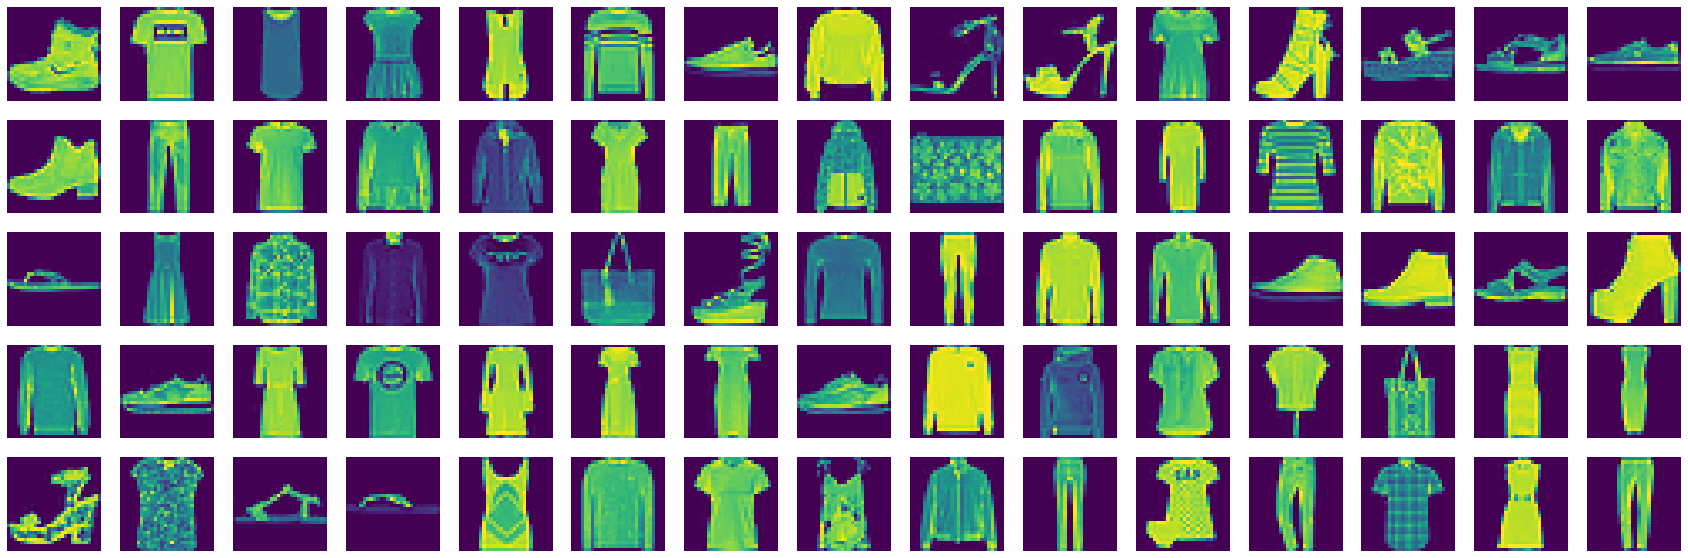

In [3]:
fig = plt.figure(figsize=(30,10))
for i in range(75):

    plt.subplot(5, 15, i+1)

    plt.imshow(x_train[i])
    
    plt.axis('off')

plt.show()

In [4]:

model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4779 - accuracy: 0.8292 - val_loss: 0.4415 - val_accuracy: 0.8424
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3603 - accuracy: 0.8691 - val_loss: 0.3847 - val_accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3239 - accuracy: 0.8811 - val_loss: 0.3621 - val_accuracy: 0.8694
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2968 - accuracy: 0.8916 - val_loss: 0.3378 - val_accuracy: 0.8761
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2806 - accuracy: 0.8952 - val_loss: 0.3324 - val_accuracy: 0.8816
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2653 - accuracy: 0.9013 - val_loss: 0.3688 - val_accuracy: 0.8749
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2543 - accuracy: 0.9047 - val_loss: 0.3403 - val_ac

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3498 - accuracy: 0.8795


[0.34981924295425415, 0.8794999718666077]

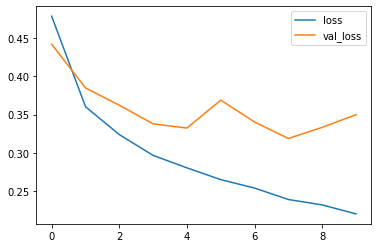

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

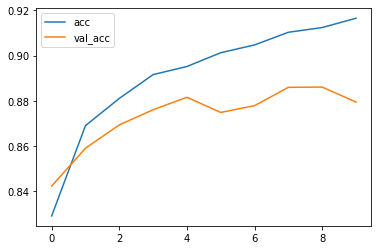

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
y_predict=model.predict(x_test).argmax(axis=1)

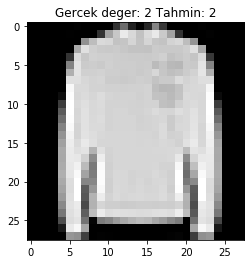

In [16]:
i=random.randint(0, 9999)
plt.imshow(x_test[i], cmap='gray')

plt.title("Gercek deger: %s Tahmin: %s" % (y_test[i], y_predict[i]));